In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
# Load the dataset

data = pd.read_csv("/content/Copy of amazon_tablet_webscraping(1).csv", encoding='latin1')

In [30]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME OF TABLET    277 non-null    object
 1   DISCOUNTED PRICE  277 non-null    object
 2   M.R.P.            277 non-null    object
 3   DISCOUNT          277 non-null    object
 4   RATING            277 non-null    object
 5   NUMBER OF RATING  277 non-null    object
 6   URL OF TABLET     277 non-null    object
dtypes: object(7)
memory usage: 15.3+ KB
None


In [31]:
# Display the first few rows of the dataset
print(data.head())

                                      NAME OF TABLET DISCOUNTED PRICE  \
0  Samsung Galaxy Tab A9+ 27.94 cm (11.0 inch) Di...          ?19,999   
1  Samsung Galaxy Tab S6 Lite 26.31 cm (10.4 inch...          ?22,999   
2  Redmi Pad SE| All Day Battery | Qualcomm Snapd...          ?14,999   
3  Samsung Galaxy Tab A9+ 27.94 cm (11.0 inch) Di...          ?19,999   
4  HONOR Pad 9 with Free Bluetooth Keyboard, 12.1...          ?23,999   

    M.R.P.   DISCOUNT              RATING NUMBER OF RATING  \
0  ?27,999  (29% off)  4.0 out of 5 stars              430   
1  ?30,999  (26% off)  4.4 out of 5 stars            2,432   
2  ?19,999  (25% off)  3.9 out of 5 stars              141   
3  ?27,999  (29% off)  4.0 out of 5 stars              430   
4  ?34,999  (31% off)  4.1 out of 5 stars              140   

                                       URL OF TABLET  
0  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
1  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
2  https://www.amazon.i

In [32]:
# Summary statistics
print(data.describe(include='all'))

                                           NAME OF TABLET DISCOUNTED PRICE  \
count                                                 277              277   
unique                                                229              158   
top     Redmi Pad SE| All Day Battery | Qualcomm Snapd...          ?12,999   
freq                                                    3               12   

         M.R.P.   DISCOUNT              RATING NUMBER OF RATING  \
count       277        277                 277              277   
unique      118         67                  26              121   
top     ?14,999  (13% off)  4.5 out of 5 stars               86   
freq         13         12                  32               18   

                                            URL OF TABLET  
count                                                 277  
unique                                                276  
top     https://www.amazon.in/Microsoft-Surface-Pro-12...  
freq                             

In [33]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

NAME OF TABLET      0
DISCOUNTED PRICE    0
M.R.P.              0
DISCOUNT            0
RATING              0
NUMBER OF RATING    0
URL OF TABLET       0
dtype: int64


In [34]:
# Convert RATING to float
data['RATING'] = data['RATING'].str.extract(r'(\d+\.\d+)').astype(float)

In [35]:
# Convert NUMBER OF RATING to int after removing commas
data['NUMBER OF RATING'] = data['NUMBER OF RATING'].str.replace(',', '').astype(int)

In [36]:
# Convert DISCOUNTED PRICE and M.R.P. to int after removing currency symbols
data['DISCOUNTED PRICE'] = data['DISCOUNTED PRICE'].str.replace(r'[\?,]', '', regex=True).astype(int, errors='ignore')
data['M.R.P.'] = pd.to_numeric(data['M.R.P.'].str.replace(r'[\?,]', '', regex=True), errors='coerce')

In [37]:
# Convert DISCOUNT to percentage
data['DISCOUNT'] = data['DISCOUNT'].str.extract(r'(\d+)%').astype(float)

In [38]:
# Extract brand names
data['BRAND'] = data['NAME OF TABLET'].apply(lambda x: x.split()[0])

In [39]:
# Calculate total number of ratings for each brand
brand_ratings = data.groupby('BRAND')['NUMBER OF RATING'].sum().reset_index()

In [40]:
# Calculate market share for each brand
total_ratings = brand_ratings['NUMBER OF RATING'].sum()
brand_ratings['MARKET SHARE'] = (brand_ratings['NUMBER OF RATING'] / total_ratings) * 100

In [41]:
print(brand_ratings)

            BRAND  NUMBER OF RATING  MARKET SHARE
0   (Refurbished)               605      0.250903
1            Acer                30      0.012441
2         Android               108      0.044789
3           Apple             22730      9.426490
4            DOMO              1425      0.590970
5          Enable                44      0.018247
6          Google               529      0.219385
7           HONOR              3725      1.544816
8           Honor               307      0.127318
9           IKALL               130      0.053913
10           Lava               114      0.047278
11         Lenovo             69665     28.891174
12      Microsoft              1550      0.642809
13       Motorola               294      0.121926
14          Nokia              2106      0.873391
15           OPPO               392      0.162569
16        OnePlus               616      0.255465
17         PRITOM               200      0.082943
18         Pritom               300      0.124415


In [42]:
# Get top 5 best-selling tablets for each brand
top_5_tablets = data.groupby('BRAND').apply(lambda x: x.nlargest(5, 'NUMBER OF RATING')).reset_index(drop=True)

In [43]:
print(top_5_tablets)

                                       NAME OF TABLET DISCOUNTED PRICE  \
0   (Refurbished) Nokia T20 Tablet, 4GB RAM, 8200m...            11249   
1   (Refurbished) Samsung Galaxy Tab S7 FE 31.5 cm...            26249   
2   (Refurbished) Samsung Galaxy Tab S7 FE 31.5 cm...            26249   
3   (Refurbished) Samsung Galaxy Tab A8 26.69cm (1...            11900   
4   (Refurbished) Samsung Galaxy Tab S6 Lite 26.31...            17199   
..                                                ...              ...   
83  realme Pad WiFi+4G Tablet | 3GB RAM 32GB ROM (...            15998   
84  realme Pad WiFi+4G Tablet | 3GB RAM 32GB ROM (...            15999   
85  realme Pad WiFi+4G Tablet | 4GB RAM 64GB ROM (...            18599   
86  realme Pad Mini WiFi Tablet | 3GB RAM 32GB ROM...             9999   
87  realme Pad Mini WiFi Tablet | 4GB RAM 64GB ROM...            10699   

    M.R.P.  DISCOUNT  RATING  NUMBER OF RATING  \
0    14999      25.0     3.7               104   
1    34999 

                                      NAME OF TABLET DISCOUNTED PRICE  M.R.P.  \
0  (Refurbished) Samsung Galaxy Tab A9 22.10 cm (...            10499   14999   
1  DOMO Slate Tab SSM28 OS11 8-inch 4G Calling Ta...             6999   26990   
2  Apple iPad (10th Generation): with A14 Bionic ...            34900   44900   
3  Samsung Galaxy Tab S8 | 27.81cm (11.0") LCD Di...            50998   66999   
4  Apple iPad Air (5th Generation): with M1 chip,...            74900   89900   
5  Samsung Galaxy Tab S9 Ultra 36.99 cm (14.6 inc...           111999  133999   

   DISCOUNT  RATING  NUMBER OF RATING  \
0      30.0     5.0                 1   
1      74.0     5.0                 3   
2      22.0     4.6              1051   
3      24.0     4.6               442   
4      17.0     4.6               279   
5      16.0     4.6                50   

                                       URL OF TABLET          BRAND  \
0  https://www.amazon.in/Refurbished-Samsung-Gala...  (Refurbished)   
1 

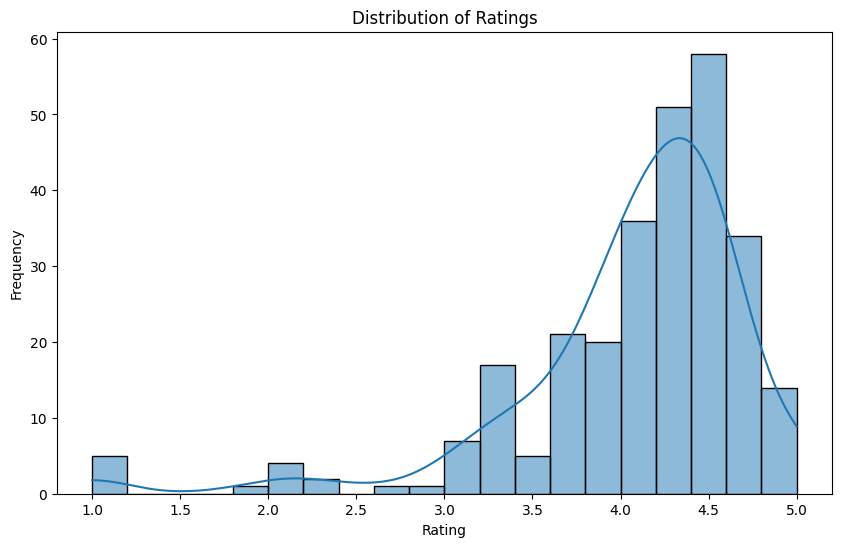

In [44]:
# Define price ranges
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']
data['PRICE RANGE'] = pd.cut(data['M.R.P.'], bins=bins, labels=labels)

# Identify top rated tablets within each price range
top_rated_per_price_range = data.groupby('PRICE RANGE').apply(lambda x: x.nlargest(1, 'RATING')).reset_index(drop=True)

# Display the top rated tablets per price range
print(top_rated_per_price_range)

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


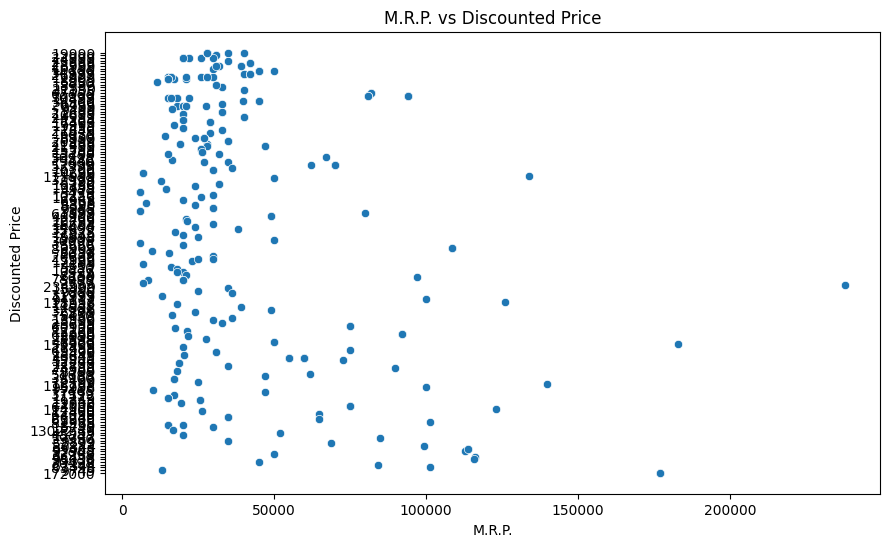

In [45]:
# Relationship between M.R.P. and discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['M.R.P.'], y=data['DISCOUNTED PRICE'])
plt.title('M.R.P. vs Discounted Price')
plt.xlabel('M.R.P.')
plt.ylabel('Discounted Price')
plt.show()


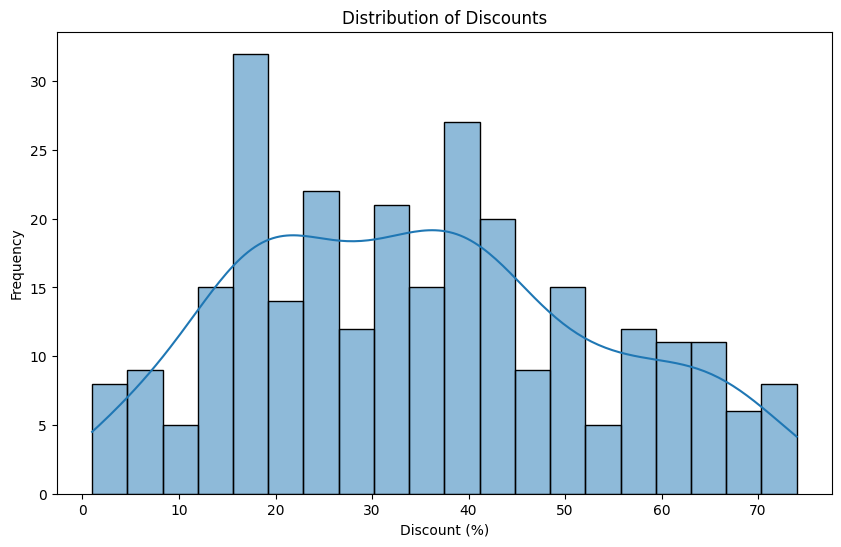

In [46]:
# Distribution of discounts
plt.figure(figsize=(10, 6))
sns.histplot(data['DISCOUNT'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Top rated tablets
top_rated = data.nlargest(10, 'RATING')

fig = px.bar(top_rated, x='NAME OF TABLET', y='RATING', title='Top 10 Rated Tablets')
fig.show()

# Plotting the market share of top-selling brands
fig = px.pie(brand_ratings, names='BRAND', values='MARKET SHARE', title='Market Share of Top-Selling Brands')
fig.show()